In [1]:
import os
import sys
sys.path.append('../ph4ser/')

def reload_libs():
    """
    This allows you to reload the library file without restarting the kernel.
    
    Usage:
    In [1]: reload_libs()
    """
    import mlibs as mlibs
    from importlib import reload
    reload(mlibs)
    import ph4ser as ph4
    reload(ph4)


                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
          Morphen                        _|||*_                _    .@@@#@.
          ph4ser                   _|||||_               .@##@#| _||_
   Radio Self-Calibration     |****_                   .@.,/\..@_.
          Module             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
     Geferson Lucatelli                        +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

In [2]:
config = ph4.Configuration()
config.cell_size = None
config.receiver = None
config.imsize = int(2.5*1024)
config.imsizey = int(2.5*1024)
steps = [
    'startup',          # create directory structure, start variables and clear visibilities.
#     'fov_image',      # create a FOV image
    'save_init_flags',  # save (or restore) the initial flags
    'statwt',           # run statwt on the initial data
    'autoflag_init',    # run rflag on the initial data -- use for L and S band data.
    'test_image',       # create a test image
    'select_refant',    # select reference antenna
    'p0',               # initial test  of selfcal, phase only (p)
    'p1',               # redo phase-only selfcal (if enough flux density); ignores p0
    'p2',               # continue phase-only selfcal (incremental)
    'ap1',              # amp-selfcal (ap); uses p0 or (p1 and p2)
    'split_trial_1',    # split the data after first trial (and run wsclean)
    # 'autoflag_final',   # run rflag on the final data (use for L and S band data)
    'report_results'    # report results of first trial
]

In [3]:
pipeline = ph4.Pipeline(config)

In [4]:
config.path = "/media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/"
config.field = "MCG12-02-001"
config.vis_name = "MCG12-02-001.calibrated.avg"
config.savename = "_A_C_sf"
config.visibility_info = {'path':config.path,
                          'field':config.field,
                          'vis_name':config.vis_name,
                          'savename':config.savename
                         }

print(config.visibility_info)

{'path': '/media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/', 'field': 'MCG12-02-001', 'vis_name': 'MCG12-02-001.calibrated.avg', 'savename': '_A_C_sf'}


In [5]:
pipeline.run_step('startup')
config.cell_size = pipeline.get_cell_size(pipeline.g_vis)
print(f"Cell size = {config.cell_size}")
config.receiver = pipeline.check_band(pipeline.g_vis)
print(f"Receiver = {config.receiver}")

++==> Preparing to selfcalibrate /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/MCG12-02-001.calibrated.avg
++==> Creating basic directory structure.
++==> Generating listobs file.
--==> Clearing model column...


2025-01-17 10:50:41	WARN	clearcal::calibrater::setvi(bool,bool)	Forcing use of OLD VisibilityIterator.


Cell size = 0.0421arcsec
Receiver = C


In [6]:
if 'save_init_flags' in config.steps:
    pipeline.run_step('save_init_flags')
if 'statwt' in config.steps:
    pipeline.run_step('statwt')
if 'autoflag_init' in config.steps:
    pipeline.run_step('autoflag_init')

     --==> Skipping flagging backup init (exists).
     --==> Restoring flags to original...
 ++==> Amount of data flagged at the start of selfcal.
field MCG12-02-001: 16.7 percent flagged
observation 0: 16.7 percent flagged
     --==> Skipping statwt (flag file exists).
     ++==> Running initweights instead.
 ++==>> Flag statistics before auto-flagging
field MCG12-02-001: 16.7 percent flagged
observation 0: 16.7 percent flagged


2025-01-17 10:50:56	WARN	flagmanager::::casa	Version name 'selfcal_before_rflag' already exist. Will rename it to selfcal_before_rflag.old.1737111055


 ++==>> Using rflag mode for flagging...


2025-01-17 10:50:57	WARN	flagdata::::casa	Disabling savepars for the display
2025-01-17 10:52:25	WARN	flagmanager::::casa	Version name 'selfcal_after_rflag' already exist. Will rename it to selfcal_after_rflag.old.1737111145


 ++==> Flag statistics after rflag:
field MCG12-02-001: 17.6 percent flagged
observation 0: 17.6 percent flagged


  0.0
Using mtmfs method.
test_image_MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec___r0.0
Skipping imaging; already done.
 ++==>> Exec time cleaning = 0.0 s
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 7.01 +/- 1.71 mJy
Fractional error = 0.24
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 7.01 +/- 1.21 mJy
Fractional error = 0.17
-----------------------------------------------------------------
Flux density =  0.007008896461789633
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 4.73 +/- 1.57 mJy
Fractional error = 0.33
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 4.73 +/- 0.80 mJy
Fractional error = 0.17
-----------------------------------------------------------------
Flux density =  0.004726086061061038
----------------------

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 958.27it/s]


{'A1': {'best': 5.285137815838849, 'lower_bound': 4.84365867378632, 'upper_bound': 5.716914723729967, 'lower': 0.441479142052529, 'upper': 0.431776907891118}, 'alpha': {'best': -2.254478711179571, 'lower_bound': -2.615354711727953, 'upper_bound': -1.903546025187486, 'lower': 0.360876000548382, 'upper': 0.35093268599208494}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     5.52990029 +/- 0.40746041 (7.37%) (init = 5.5299)
    alpha: -2.06032574 +/- 0.27140037 (13.17%) (init = -2.060326)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.884
Initial Template of Parameters: very_faint
╭──────────────────────┬──────────────────────╮
│            Parameter │                Value │
├──────────────────────┼──────────────────────┤
│               robust │                  0.5 │
│               solint │                 120s │
│           sigma_mask │                   12 │
│ mask_grow_itera

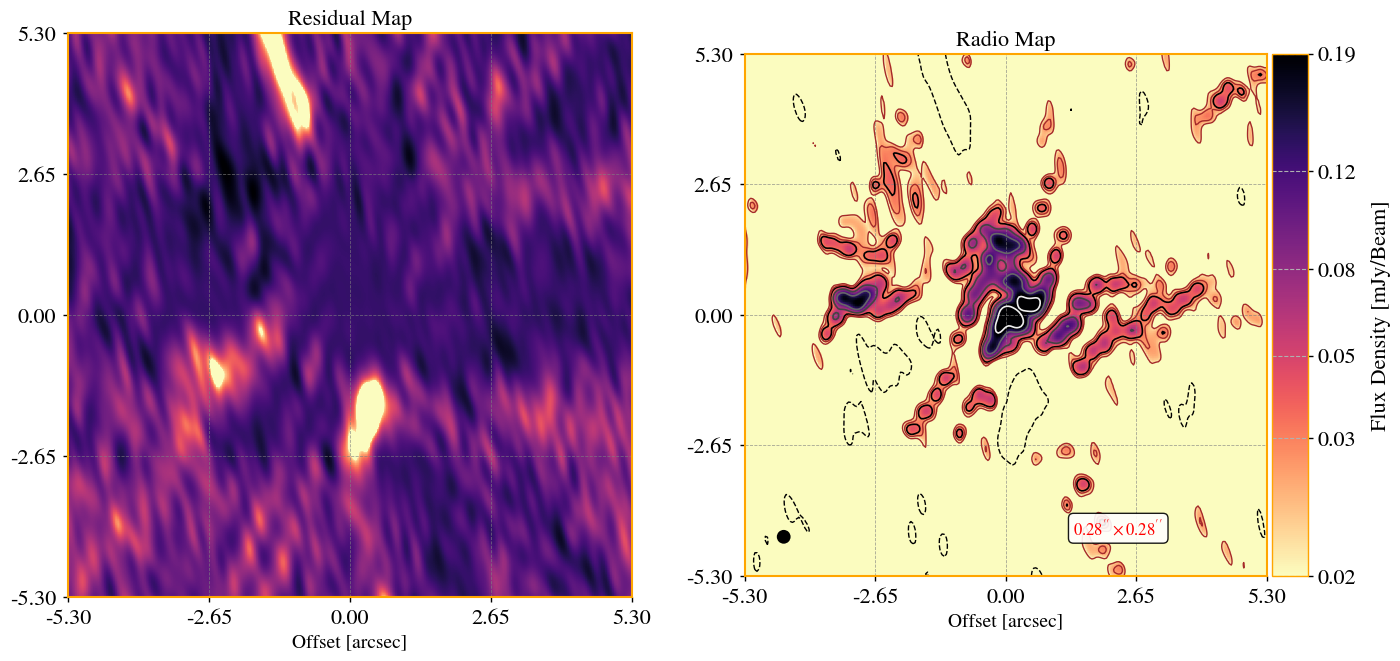

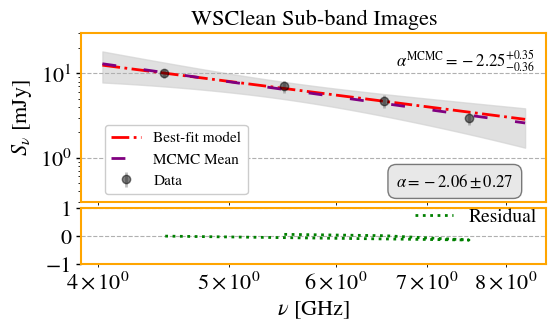

<Figure size 600x400 with 0 Axes>

In [7]:
if 'test_image' in config.steps:
    pipeline.run_step('test_image')
pipeline.check_init_parameters()

 ++==> Estimating order of best referent antennas...
1 of 54 solutions flagged due to SNR < 1 in spw=7 at 2023/09/19/18:58:01.5
1 of 54 solutions flagged due to SNR < 1 in spw=11 at 2023/09/19/18:58:01.6
1 of 54 solutions flagged due to SNR < 1 in spw=12 at 2023/09/19/18:58:01.1
1 of 54 solutions flagged due to SNR < 1 in spw=13 at 2023/09/19/18:58:00.4
1 of 54 solutions flagged due to SNR < 1 in spw=15 at 2023/09/19/18:58:01.5
1 of 54 solutions flagged due to SNR < 1 in spw=18 at 2023/09/19/18:58:01.2
3 of 54 solutions flagged due to SNR < 1 in spw=19 at 2023/09/19/18:58:00.6
2 of 54 solutions flagged due to SNR < 1 in spw=20 at 2023/09/19/18:58:01.3
1 of 54 solutions flagged due to SNR < 1 in spw=22 at 2023/09/19/18:58:01.1
5 of 54 solutions flagged due to SNR < 1 in spw=23 at 2023/09/19/18:58:00.9
2 of 54 solutions flagged due to SNR < 1 in spw=24 at 2023/09/19/18:58:01.4
1 of 54 solutions flagged due to SNR < 1 in spw=25 at 2023/09/19/18:58:01.2
1 of 52 solutions flagged due to SNR

Qt: Session management error: None of the authentication protocols specified are supported


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
Antennas sorted by % of good solutions:
ea15: 100.0, <SNR> = 19.9
ea02: 100.0, <SNR> =  9.8
ea06: 100.0, <SNR> =  9.7
ea08: 100.0, <SNR> = 15.5
ea23: 100.0, <SNR> = 19.1
ea09: 100.0, <SNR> =  9.2
ea10: 100.0, <SNR> = 17.8
ea12: 100.0, <SNR> = 14.6
ea14: 100.0, <SNR> = 15.1
ea18: 100.0, <SNR> = 19.3
ea16: 99.4, <SNR> =  8.2
ea01: 99.4, <SNR> =  7.0
ea19: 99.4, <SNR> =  6.2
ea07: 98.8, <SNR> = 10.8
ea17: 98.1, <SNR> = 13.3
ea22: 96.9, <SNR> = 20.2
ea28: 96.9, <SNR> = 16.7
ea11: 96.2, <SNR> =  4.7
ea26: 96.2, <SNR> =  5.5
ea20: 95.6, <SNR> =  4.0
ea05: 93.1, <SNR> =  5.7
ea27: 91.2, <SNR> =  4.5
ea03: 86.9, <SNR> =  2.8
ea04: 86.2, <SNR> =  3.2
ea24: 85.6, <SNR> =  2.8
ea25: 83.1, <SNR> =  2.9
ea21: 58.1, <SNR> =  2.2
 ++==

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 5, PID 2996321 on stardust
Node 6, PID 2996322 on stardust
Node 7, PID 2996324 on stardust
Node 0, PID 2996316 on stardust
Node 2, PID 2996318 on stardust
Node 3, PID 2996319 on stardust
Node 4, PID 2996320 on stardust
Node 1, PID 2996317 on stardust
2025-Jan-17 10:58:16.011331 Process 5 finished.
2025-Jan-17 10:58:16.011332 Process 6 finished.
2025-Jan-17 10:58:16.011362 Process 1 finished.
2025-Jan-17 10:58:16.011332 Process 7 finished.
2025-Jan-17 10:58:16.011331 Process 4 finished.
2025-Jan-17 10:58:16.011316 Process 0 finished.
2025-Jan-17 10:58:16.011362 Process 2 finished.
2025-Jan-17 10:58:16.011368 Process 3 finished.
  0.5
Using mtmfs method.
test_image_0_MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec___r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLIN_portable.sif mpir

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 952.77it/s]


{'A1': {'best': 5.730581056325424, 'lower_bound': 5.391995532048396, 'upper_bound': 6.060057943118702, 'lower': 0.33858552427702815, 'upper': 0.3294768867932776}, 'alpha': {'best': -2.3187579806942384, 'lower_bound': -2.5756212416118203, 'upper_bound': -2.0673383885335963, 'lower': 0.2568632609175818, 'upper': 0.25141959216064214}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     5.89177515 +/- 0.32214525 (5.47%) (init = 5.891775)
    alpha: -2.19313232 +/- 0.19891287 (9.07%) (init = -2.193132)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.899


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 0, PID 3003040 on stardust
Node 1, PID 3003041 on stardust
Node 2, PID 3003042 on stardust
Node 3, PID 3003043 on stardust
Node 4, PID 3003044 on stardust
Node 5, PID 3003045 on stardust
Node 6, PID 3003046 on stardust
Node 7, PID 3003047 on stardust
2025-Jan-17 11:02:38.268005 Process 0 finished.
2025-Jan-17 11:02:38.268035 Process 1 finished.
2025-Jan-17 11:02:38.268042 Process 2 finished.
2025-Jan-17 11:02:38.268097 Process 3 finished.
2025-Jan-17 11:02:38.268016 Process 4 finished.
2025-Jan-17 11:02:38.268016 Process 5 finished.
2025-Jan-17 11:02:38.268016 Process 6 finished.
2025-Jan-17 11:02:38.268017 Process 7 finished.
  0.5
Using mtmfs method.
0_start_image__MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec___r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLIN_portable.sif mp

2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 0 is smaller than specified chanbin 9999
2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 0
2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 1 is smaller than specified chanbin 9999
2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 1
2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 2 is smaller than specified chanbin 9999
2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 2
2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 3 is smaller than specified chanbin 9999
2025-01-17 11:02:39	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SP

-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 10.61 +/- 0.52 mJy
Fractional error = 0.05
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 10.61 +/- 0.57 mJy
Fractional error = 0.05
-----------------------------------------------------------------
Flux density =  0.010606928222060007
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 7.27 +/- 1.25 mJy
Fractional error = 0.17
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 7.27 +/- 0.75 mJy
Fractional error = 0.10
-----------------------------------------------------------------
Flux density =  0.0072651694952153255
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 4.89 +/- 1.26 mJy
Fractional error = 0.26

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 944.95it/s]


{'A1': {'best': 5.741492942934864, 'lower_bound': 5.27253831017515, 'upper_bound': 6.2009386417193, 'lower': 0.46895463275971316, 'upper': 0.4594456987844362}, 'alpha': {'best': -2.125818528341994, 'lower_bound': -2.4491712582060923, 'upper_bound': -1.8170798909671508, 'lower': 0.32335272986409835, 'upper': 0.3087386373748431}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     5.82065922 +/- 0.32241394 (5.54%) (init = 5.820659)
    alpha: -2.06735417 +/- 0.19684611 (9.52%) (init = -2.067354)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.943
 ++==> Estimating order of best referent antennas...
2 of 54 solutions flagged due to SNR < 1 in spw=18 at 2023/09/19/18:58:03.1
1 of 54 solutions flagged due to SNR < 1 in spw=19 at 2023/09/19/18:58:02.0
1 of 54 solutions flagged due to SNR < 1 in spw=20 at 2023/09/19/18:58:02.6
1 of 54 solutions flagged due to SNR < 1 in spw=21 at 2023/09/

2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 0 is smaller than specified chanbin 9999
2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 0
2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 1 is smaller than specified chanbin 9999
2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 1
2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 2 is smaller than specified chanbin 9999
2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 2
2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 3 is smaller than specified chanbin 9999
2025-01-17 11:09:22	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SP

Node 0, PID 3040326 on stardust
Node 1, PID 3040327 on stardust
Node 2, PID 3040328 on stardust
Node 3, PID 3040329 on stardust
Node 4, PID 3040330 on stardust
Node 5, PID 3040331 on stardust
Node 7, PID 3040333 on stardust
Node 6, PID 3040332 on stardust
2025-Jan-17 11:23:38.432871 Process 4 finished.
2025-Jan-17 11:23:38.432871 Process 7 finished.
2025-Jan-17 11:23:38.432871 Process 5 finished.
2025-Jan-17 11:23:38.432871 Process 6 finished.
2025-Jan-17 11:23:38.432856 Process 0 finished.
2025-Jan-17 11:23:38.432907 Process 1 finished.
2025-Jan-17 11:23:38.432902 Process 2 finished.
2025-Jan-17 11:23:38.432907 Process 3 finished.
  0.5
Using mtmfs method.
selfcal_test_0_MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec_multiscale__r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLIN_porta

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1004.04it/s]


{'A1': {'best': 20.76036223978553, 'lower_bound': 20.087566616404356, 'upper_bound': 21.437226696239158, 'lower': 0.6727956233811732, 'upper': 0.6768644564536288}, 'alpha': {'best': -1.1390200049888648, 'lower_bound': -1.2962692758285637, 'upper_bound': -0.9832408033148496, 'lower': 0.15724927083969886, 'upper': 0.15577920167401516}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     23.1132209 +/- 5.33243913 (23.07%) (init = 23.11322)
    alpha: -0.65997658 +/- 0.95940479 (145.37%) (init = -0.6599766)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.914
 ++++>> Template of Parameters to be used from now on: standard_1


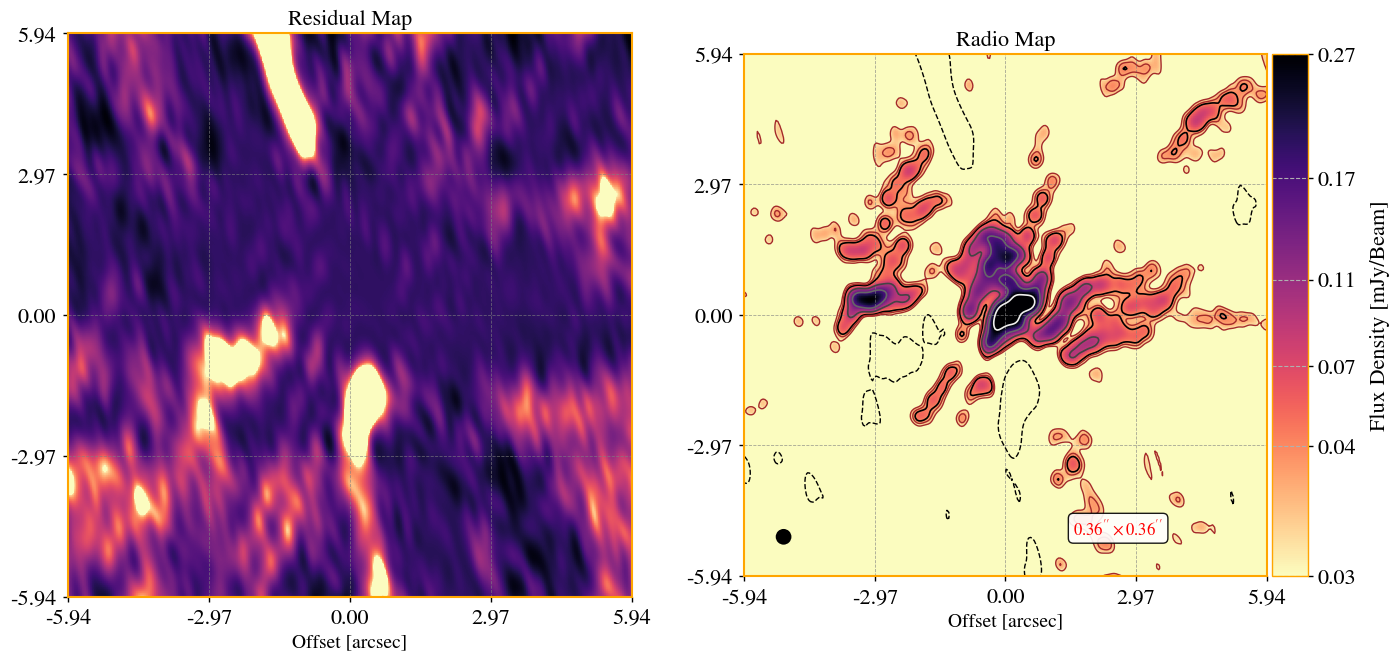

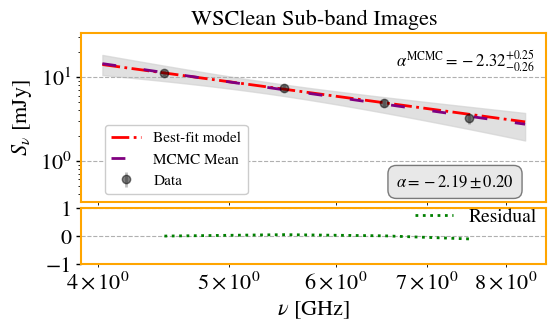

<Figure size 600x400 with 0 Axes>

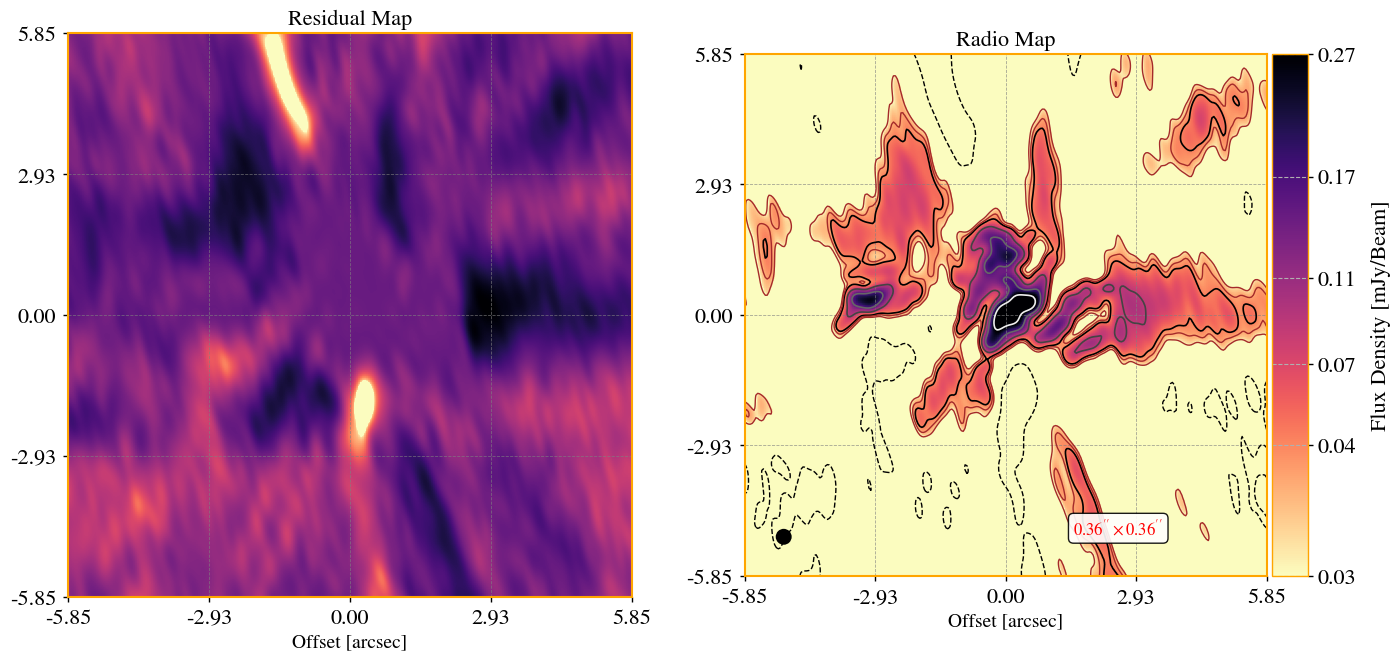

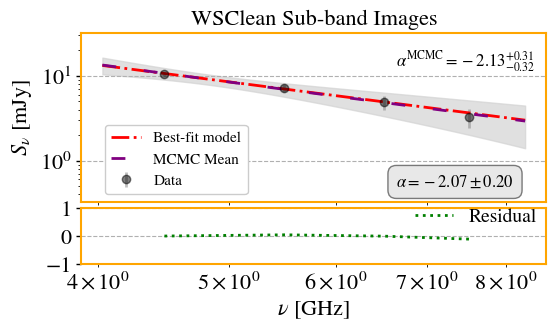

<Figure size 600x400 with 0 Axes>

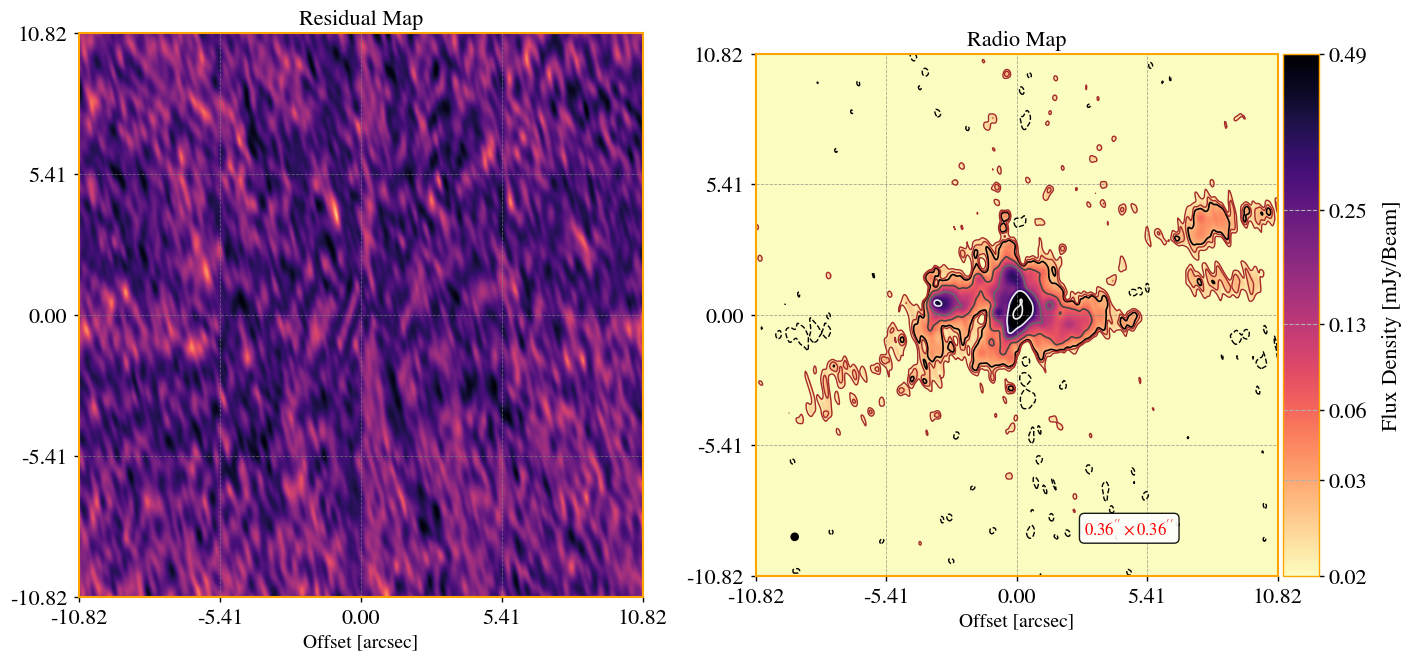

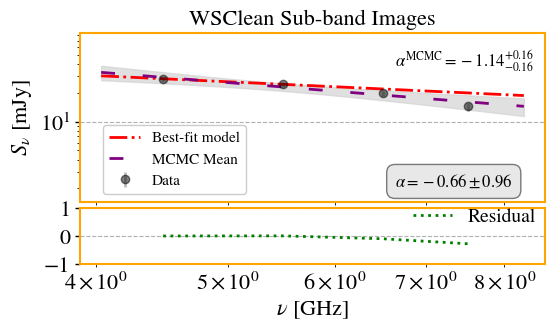

<Figure size 600x400 with 0 Axes>

In [8]:
if 'select_refant' in config.steps:
    pipeline.run_step('select_refant')

if 'p0' in config.steps:
    pipeline.run_step('p0')
pipeline.check_p0_parameters()

Params that are currently being used: standard_1
╭──────────────────────┬──────────────────────╮
│            Parameter │                Value │
├──────────────────────┼──────────────────────┤
│               robust │                    0 │
│               solint │                  96s │
│           sigma_mask │                   30 │
│ mask_grow_iterations │                    4 │
│              combine │                      │
│             gaintype │                    G │
│              calmode │                    p │
│               minsnr │                  0.1 │
│               spwmap │                      │
│      nsigma_automask │                  3.0 │
│ nsigma_autothreshold │                  1.5 │
│              uvtaper │                      │
│      with_multiscale │                    1 │
│               scales │                 None │
│      compare_solints │                    0 │
╰──────────────────────┴──────────────────────╯


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 0, PID 3169933 on stardust
Node 1, PID 3169934 on stardust
Node 2, PID 3169935 on stardust
Node 4, PID 3169937 on stardust
Node 5, PID 3169938 on stardust
Node 6, PID 3169939 on stardust
Node 7, PID 3169940 on stardust
Node 3, PID 3169936 on stardust
2025-Jan-17 11:37:01.230858 Process 0 finished.
2025-Jan-17 11:37:01.230873 Process 7 finished.
2025-Jan-17 11:37:01.230873 Process 4 finished.
2025-Jan-17 11:37:01.230872 Process 5 finished.
2025-Jan-17 11:37:01.230873 Process 6 finished.
2025-Jan-17 11:37:01.231046 Process 2 finished.
2025-Jan-17 11:37:01.231054 Process 3 finished.
2025-Jan-17 11:37:01.231045 Process 1 finished.
  0.0
Using mtmfs method.
1_update_model_image__MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec_multiscale__r0.0
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLI

<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.007687531849485555
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.2174e+00                                    1.11e+04    
       1              5         4.7056e+00      1.51e+00       7.14e-01       3.43e+04    
       2              7         3.2676e+00      1.44e+00       3.58e-01       3.76e+04    
       3              8         2.7833e+00      4.84e-01       2.76e-01       2.91e+01    
       4              9         2.7280e+00      5.52e-02       2.41e-02       2.37e+01    
       5             10         2.6369e+00      9.12e-02       4.56e-02       1.82e+01    
       6             11         2.5160e+00      1.21e-01       8.80e-02       6.20e+00    
       7             12         2.5045e+00      1.15e-02       3.29e-02       2.09e-01    
       8             13         2.5045e+00      4.79e-06       5.94e-04       9.68e-03    
       9             14         2.5045e+00      1.52e

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 998.07it/s]


{'A1': {'best': 10.876656578010536, 'lower_bound': 10.461918021766612, 'upper_bound': 11.276860569213074, 'lower': 0.41473855624392364, 'upper': 0.40020399120253813}, 'alpha': {'best': -1.003825937285007, 'lower_bound': -1.1736224641293695, 'upper_bound': -0.8337127549329593, 'lower': 0.16979652684436264, 'upper': 0.17011318235204764}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     11.1621245 +/- 0.74283658 (6.65%) (init = 11.16212)
    alpha: -0.85936635 +/- 0.27272698 (31.74%) (init = -0.8593664)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.698
1 of 54 solutions flagged due to SNR < 0.10000000149 in spw=0 at 2023/09/19/19:01:07.1
1 of 54 solutions flagged due to SNR < 0.10000000149 in spw=8 at 2023/09/19/19:01:07.0
1 of 54 solutions flagged due to SNR < 0.10000000149 in spw=16 at 2023/09/19/18:56:52.0
1 of 38 solutions flagged due to SNR < 0.10000000149 in spw=27 at 2023/

2025-01-17 11:38:46	WARN	flagmanager::::casa	Version name 'before_selfcal_mode_p' already exist. Will rename it to before_selfcal_mode_p.old.1737113926


     => Reporting data flagged before selfcal apply interaction 1 ...
field MCG12-02-001: 17.7 percent flagged
observation 0: 17.7 percent flagged
     => Reporting data flagged after selfcal apply interaction 1 ...
field MCG12-02-001: 18.0 percent flagged
observation 0: 18.0 percent flagged


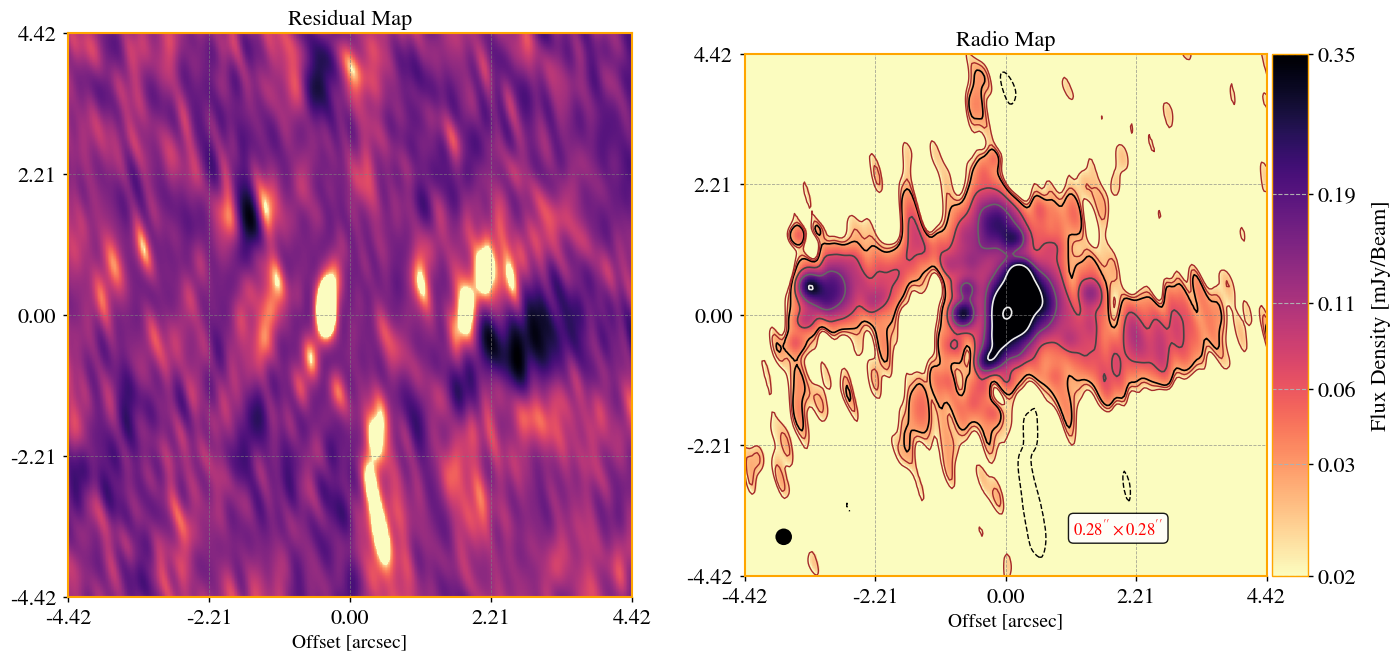

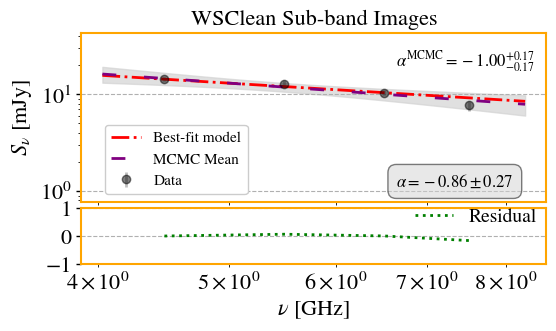

<Figure size 600x400 with 0 Axes>

In [9]:
if (('p1' in config.steps) and ('p1' not in pipeline.steps_performed) and
        ('p1' in pipeline.parameter_selection['p0_pos'])):
    pipeline.run_step('p1')

Params that are currently being used: standard_1
╭──────────────────────┬──────────────────────╮
│            Parameter │                Value │
├──────────────────────┼──────────────────────┤
│               robust │                  0.5 │
│               solint │                  48s │
│           sigma_mask │                   15 │
│ mask_grow_iterations │                    4 │
│              combine │                      │
│             gaintype │                    T │
│              calmode │                    p │
│               minsnr │                  0.1 │
│               spwmap │                   [] │
│      nsigma_automask │                  3.0 │
│ nsigma_autothreshold │                  1.0 │
│              uvtaper │                      │
│      with_multiscale │                    1 │
│               scales │                 None │
│      compare_solints │                    0 │
╰──────────────────────┴──────────────────────╯


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 3, PID 3280042 on stardust
Node 4, PID 3280043 on stardust
Node 5, PID 3280044 on stardust
Node 6, PID 3280045 on stardust
Node 0, PID 3280039 on stardust
Node 1, PID 3280040 on stardust
Node 2, PID 3280041 on stardust
Node 7, PID 3280046 on stardust
2025-Jan-17 11:51:01.511537 Process 6 finished.
2025-Jan-17 11:51:01.511525 Process 0 finished.
2025-Jan-17 11:51:01.511537 Process 4 finished.
2025-Jan-17 11:51:01.511537 Process 5 finished.
2025-Jan-17 11:51:01.511537 Process 7 finished.
2025-Jan-17 11:51:01.511699 Process 2 finished.
2025-Jan-17 11:51:01.511697 Process 1 finished.
2025-Jan-17 11:51:01.511697 Process 3 finished.
  0.5
Using mtmfs method.
selfcal_test_1_MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec_multiscale__r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLIN_porta

<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.01851021699422761
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5321e+01                                    3.36e+03    
       1              3         2.4014e+00      1.29e+01       1.15e+01       6.24e+04    
       2              6         1.5490e+00      8.52e-01       6.87e-01       1.46e+02    
       3              7         9.9960e-01      5.49e-01       6.08e-02       1.55e+02    
       4              8         2.0676e-01      7.93e-01       1.21e-01       5.43e+01    
       5              9         4.8447e-02      1.58e-01       1.01e-01       1.27e+04    
       6             10         1.8551e-02      2.99e-02       3.03e-02       9.87e-01    
       7             11         1.8504e-02      4.63e-05       1.08e-03       2.84e-01    
       8             12         1.8504e-02      7.06e-12       5.05e-07       6.64e-07    
       9             13         1.8504e-02      1.65e-

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1215.16it/s]


{'A1': {'best': 21.890677959824465, 'lower_bound': 21.705721486864686, 'upper_bound': 22.077383212317624, 'lower': 0.18495647295977946, 'upper': 0.18670525249315872}, 'alpha': {'best': -0.7492487489780982, 'lower_bound': -0.7931567525722991, 'upper_bound': -0.7041040728173323, 'lower': 0.043908003594200884, 'upper': 0.045144676160765895}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     21.8915461 +/- 0.01836623 (0.08%) (init = 21.89155)
    alpha: -0.74821274 +/- 0.00441280 (0.59%) (init = -0.7482127)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.306


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 2, PID 3418302 on stardust
Node 3, PID 3418305 on stardust
Node 4, PID 3418307 on stardust
Node 7, PID 3418314 on stardust
Node 6, PID 3418313 on stardust
Node 5, PID 3418310 on stardust
Node 1, PID 3418297 on stardust
Node 0, PID 3418295 on stardust
2025-Jan-17 12:02:39.480299 Process 5 finished.
2025-Jan-17 12:02:39.480328 Process 2 finished.
2025-Jan-17 12:02:39.480328 Process 3 finished.
2025-Jan-17 12:02:39.480287 Process 6 finished.
2025-Jan-17 12:02:39.480287 Process 7 finished.
2025-Jan-17 12:02:39.480287 Process 4 finished.
2025-Jan-17 12:02:39.480272 Process 0 finished.
2025-Jan-17 12:02:39.480324 Process 1 finished.
  0.5
Using mtmfs method.
2_update_model_image__MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec_multiscale__r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLI

2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 0 is smaller than specified chanbin 9999
2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 0
2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 1 is smaller than specified chanbin 9999
2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 1
2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 2 is smaller than specified chanbin 9999
2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 2
2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 3 is smaller than specified chanbin 9999
2025-01-17 12:02:40	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SP

-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 20.46 +/- 2.96 mJy
Fractional error = 0.14
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 20.46 +/- 1.09 mJy
Fractional error = 0.05
-----------------------------------------------------------------
Flux density =  0.020456908448930666
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 18.44 +/- 4.13 mJy
Fractional error = 0.22
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 18.44 +/- 1.52 mJy
Fractional error = 0.08
-----------------------------------------------------------------


<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.0184352124622687
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 26.76 +/- 5.64 mJy
Fractional error = 0.21
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 26.76 +/- 2.70 mJy
Fractional error = 0.10
-----------------------------------------------------------------
Flux density =  0.02676087497171238
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 23.05 +/- 3.68 mJy
Fractional error = 0.16
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 23.05 +/- 1.62 mJy
Fractional error = 0.07
-----------------------------------------------------------------
Flux density =  0.023053963608194755
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5067e+01             

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1245.79it/s]


{'A1': {'best': 21.678144192302966, 'lower_bound': 21.504800709084076, 'upper_bound': 21.844643290604495, 'lower': 0.17334348321888982, 'upper': 0.16649909830152865}, 'alpha': {'best': -0.7193717257640808, 'lower_bound': -0.7615905881551097, 'upper_bound': -0.6768297042886997, 'lower': 0.0422188623910289, 'upper': 0.04254202147538111}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     21.6735593 +/- 0.01683365 (0.08%) (init = 21.67356)
    alpha: -0.71960318 +/- 0.00415699 (0.58%) (init = -0.7196032)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.226
1 of 27 solutions flagged due to SNR < 0.10000000149 in spw=7 at 2023/09/19/18:57:16.0
1 of 27 solutions flagged due to SNR < 0.10000000149 in spw=9 at 2023/09/19/19:04:25.7
1 of 27 solutions flagged due to SNR < 0.10000000149 in spw=21 at 2023/09/19/19:04:26.0
1 of 27 solutions flagged due to SNR < 0.10000000149 in spw=25 at 2023/0

2025-01-17 12:05:48	WARN	flagmanager::::casa	Version name 'before_selfcal_mode_p' already exist. Will rename it to before_selfcal_mode_p.old.1737115547


     => Reporting data flagged before selfcal apply interaction 2 ...
field MCG12-02-001: 18.0 percent flagged
observation 0: 18.0 percent flagged
     => Reporting data flagged after selfcal apply interaction 2 ...
field MCG12-02-001: 18.3 percent flagged
observation 0: 18.3 percent flagged


2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 0 is smaller than specified chanbin 9999
2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 0
2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 1 is smaller than specified chanbin 9999
2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 1
2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 2 is smaller than specified chanbin 9999
2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 2
2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 3 is smaller than specified chanbin 9999
2025-01-17 12:06:20	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SP

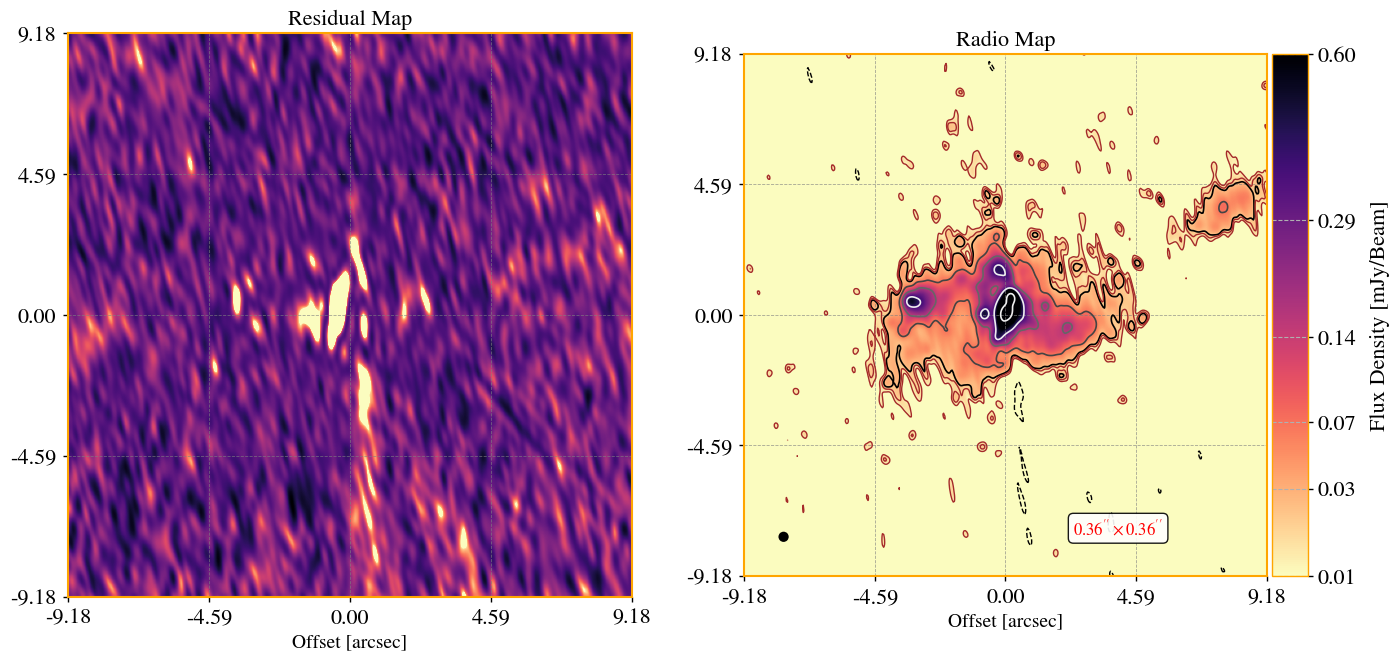

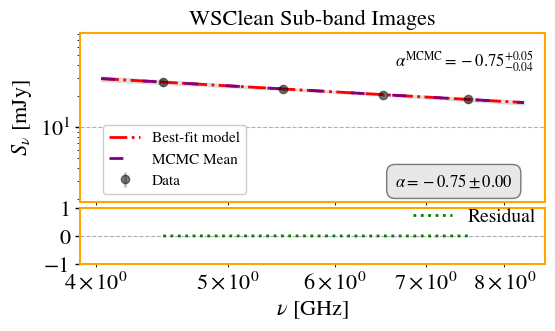

<Figure size 600x400 with 0 Axes>

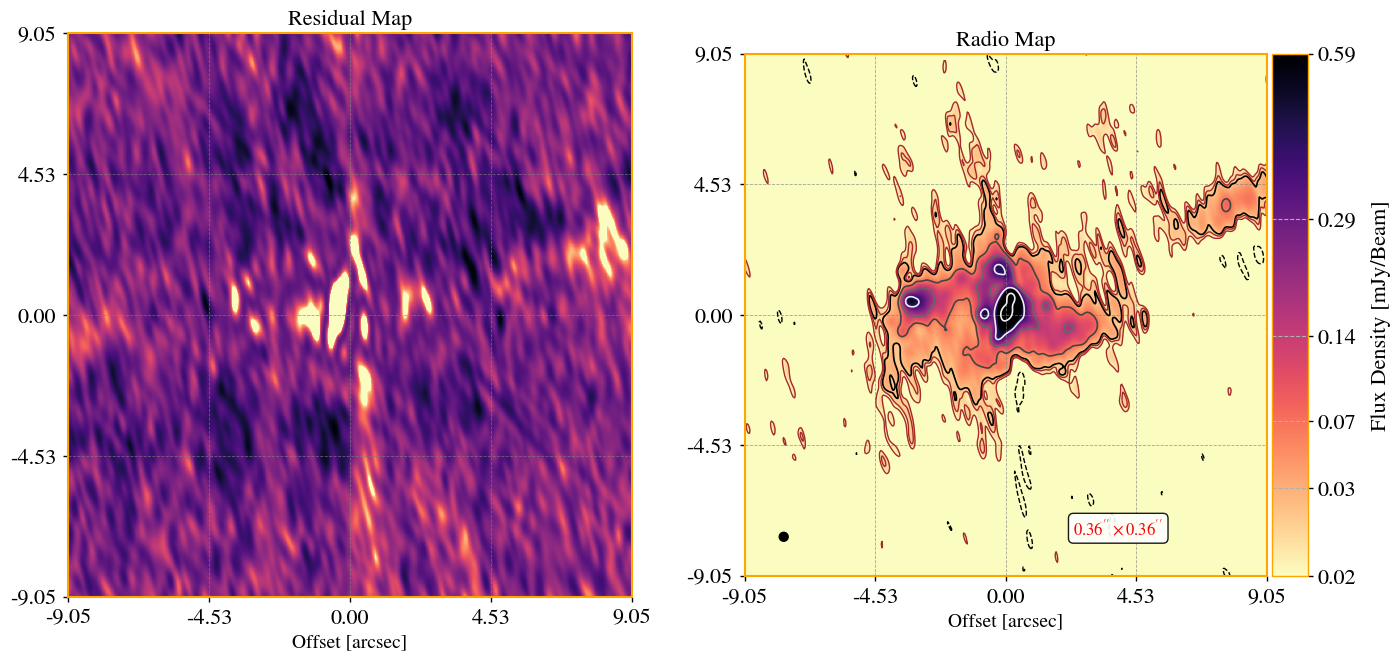

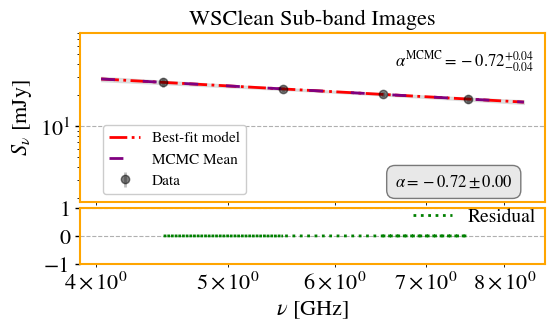

<Figure size 600x400 with 0 Axes>

In [10]:
if (('p2' in config.steps)
        and ('p2' not in pipeline.steps_performed)
        and ('p2' in pipeline.parameter_selection['p0_pos'])):
    pipeline.run_step('p2')

 ++==> Splitting phase-only self-calibrated visibility.
       Filename is: /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/MCG12-02-001_A_C_sf_p.ms
Params that are currently being used: standard_1
╭──────────────────────┬──────────────────────╮
│            Parameter │                Value │
├──────────────────────┼──────────────────────┤
│               robust │                  0.5 │
│               solint │                  96s │
│           sigma_mask │                   10 │
│ mask_grow_iterations │                    8 │
│              combine │                      │
│             gaintype │                    G │
│              calmode │                   ap │
│               minsnr │                  0.1 │
│               spwmap │               [], [] │
│      nsigma_automask │                  3.0 │
│ nsigma_autothreshold │                  1.0 │
│              uvtaper │                      │
│      with_multiscale │         

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 0, PID 3569197 on stardust
Node 3, PID 3569200 on stardust
Node 5, PID 3569202 on stardust
Node 6, PID 3569203 on stardust
Node 4, PID 3569201 on stardust
Node 7, PID 3569204 on stardust
Node 2, PID 3569199 on stardust
Node 1, PID 3569198 on stardust
2025-Jan-17 12:20:56.701994 Process 5 finished.
2025-Jan-17 12:20:56.701992 Process 4 finished.
2025-Jan-17 12:20:56.702028 Process 2 finished.
2025-Jan-17 12:20:56.701993 Process 7 finished.
2025-Jan-17 12:20:56.701979 Process 0 finished.
2025-Jan-17 12:20:56.701999 Process 6 finished.
2025-Jan-17 12:20:56.702030 Process 3 finished.
2025-Jan-17 12:20:56.702064 Process 1 finished.
  0.5
Using mtmfs method.
selfcal_test_2_MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec_multiscale__r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLIN_porta

<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.026949828549744988
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 23.69 +/- 1.96 mJy
Fractional error = 0.08
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 23.69 +/- 1.25 mJy
Fractional error = 0.05
-----------------------------------------------------------------
Flux density =  0.023688662014039946
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 21.24 +/- 3.90 mJy
Fractional error = 0.18
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 21.24 +/- 1.79 mJy
Fractional error = 0.08
-----------------------------------------------------------------


<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.021244526918577446
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6588e+01                                    2.64e+03    
       1              3         1.0925e+01      5.66e+00       1.15e+01       1.09e+04    
       2              5         8.5848e+00      2.34e+00       5.72e+00       5.33e+01    
       3              6         7.9507e+00      6.34e-01       2.99e-01       6.18e+01    
       4              7         6.2499e+00      1.70e+00       5.92e-01       9.22e+01    
       5              8         4.7906e+00      1.46e+00       1.13e+00       8.58e+01    
       6             10         2.0008e+00      2.79e+00       1.28e-01       2.17e+03    
       7             12         6.1641e-01      1.38e+00       1.10e-01       1.10e+02    
       8             14         2.8551e-01      3.31e-01       3.00e-02       9.17e+01    
       9             15         2.3230e-01      5.32e

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1202.99it/s]


{'A1': {'best': 25.162774540556267, 'lower_bound': 24.688178995712825, 'upper_bound': 25.635341716325215, 'lower': 0.47459554484344224, 'upper': 0.4725671757689476}, 'alpha': {'best': -0.7365832227352054, 'lower_bound': -0.8301596300187213, 'upper_bound': -0.6425526393399473, 'lower': 0.0935764072835159, 'upper': 0.09403058339525805}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     25.1583832 +/- 0.05283191 (0.21%) (init = 25.15838)
    alpha: -0.73757594 +/- 0.00994173 (1.35%) (init = -0.7375759)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.420


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 2, PID 3701555 on stardust
Node 3, PID 3701556 on stardust
Node 4, PID 3701557 on stardust
Node 5, PID 3701558 on stardust
Node 6, PID 3701559 on stardust
Node 7, PID 3701560 on stardust
Node 0, PID 3701553 on stardust
Node 1, PID 3701554 on stardust
2025-Jan-17 12:33:08.089595 Process 4 finished.
2025-Jan-17 12:33:08.089595 Process 5 finished.
2025-Jan-17 12:33:08.089595 Process 6 finished.
2025-Jan-17 12:33:08.089630 Process 1 finished.
2025-Jan-17 12:33:08.089595 Process 7 finished.
2025-Jan-17 12:33:08.089581 Process 0 finished.
2025-Jan-17 12:33:08.089632 Process 2 finished.
2025-Jan-17 12:33:08.089643 Process 3 finished.
  0.5
Using mtmfs method.
3_update_model_image__MCG12-02-001.calibrated.avg_2560x2560_0.0421arcsec_multiscale__r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLI

<string>:3407: RuntimeWarning: divide by zero encountered in divide


-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 23.86 +/- 3.55 mJy
Fractional error = 0.15
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 23.86 +/- 1.21 mJy
Fractional error = 0.05
-----------------------------------------------------------------


<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.023863191715591342
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 21.57 +/- 5.32 mJy
Fractional error = 0.25
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 21.57 +/- 2.21 mJy
Fractional error = 0.10
-----------------------------------------------------------------


<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.02156526461312449
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 26.93 +/- 4.35 mJy
Fractional error = 0.16
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 26.93 +/- 1.46 mJy
Fractional error = 0.05
-----------------------------------------------------------------


<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.026933364721746483
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 30.84 +/- 6.90 mJy
Fractional error = 0.22
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 30.84 +/- 2.75 mJy
Fractional error = 0.09
-----------------------------------------------------------------
Flux density =  0.03084050251976313
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6239e+01                                    2.63e+03    
       1              3         1.0613e+01      5.63e+00       1.15e+01       1.08e+04    
       2              5         7.9810e+00      2.63e+00       5.72e+00       5.74e+01    
       3              6         7.2519e+00      7.29e-01       2.91e-01       6.92e+01    
       4              7         5.4818e+00      1.77e+00       5.56e-01       4.42e+01    
       5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1229.60it/s]


{'A1': {'best': 25.249434004186945, 'lower_bound': 24.804005448301698, 'upper_bound': 25.70730544664442, 'lower': 0.4454285558852469, 'upper': 0.45787144245747413}, 'alpha': {'best': -0.6964089895100021, 'lower_bound': -0.7914354598758105, 'upper_bound': -0.5955434623497414, 'lower': 0.09502647036580847, 'upper': 0.10086552716026065}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     25.2570748 +/- 0.04719799 (0.19%) (init = 25.25707)
    alpha: -0.69159613 +/- 0.01003158 (1.45%) (init = -0.6915961)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.262
1 of 54 solutions flagged due to SNR < 0.10000000149 in spw=16 at 2023/09/19/19:12:47.7
1 of 54 solutions flagged due to SNR < 0.10000000149 in spw=31 at 2023/09/19/19:12:48.2
1 of 54 solutions flagged due to SNR < 0.10000000149 in spw=17 at 2023/09/19/19:20:47.9
1 of 50 solutions flagged due to SNR < 0.10000000149 in spw=29 at 2023/

2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 0 is smaller than specified chanbin 9999
2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 0
2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 1 is smaller than specified chanbin 9999
2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 1
2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 2 is smaller than specified chanbin 9999
2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SPW 2
2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams	Number of selected channels 32 for SPW 3 is smaller than specified chanbin 9999
2025-01-17 12:35:49	WARN	MSTransformManager::initDataSelectionParams+	Setting chanbin to 32 for SP

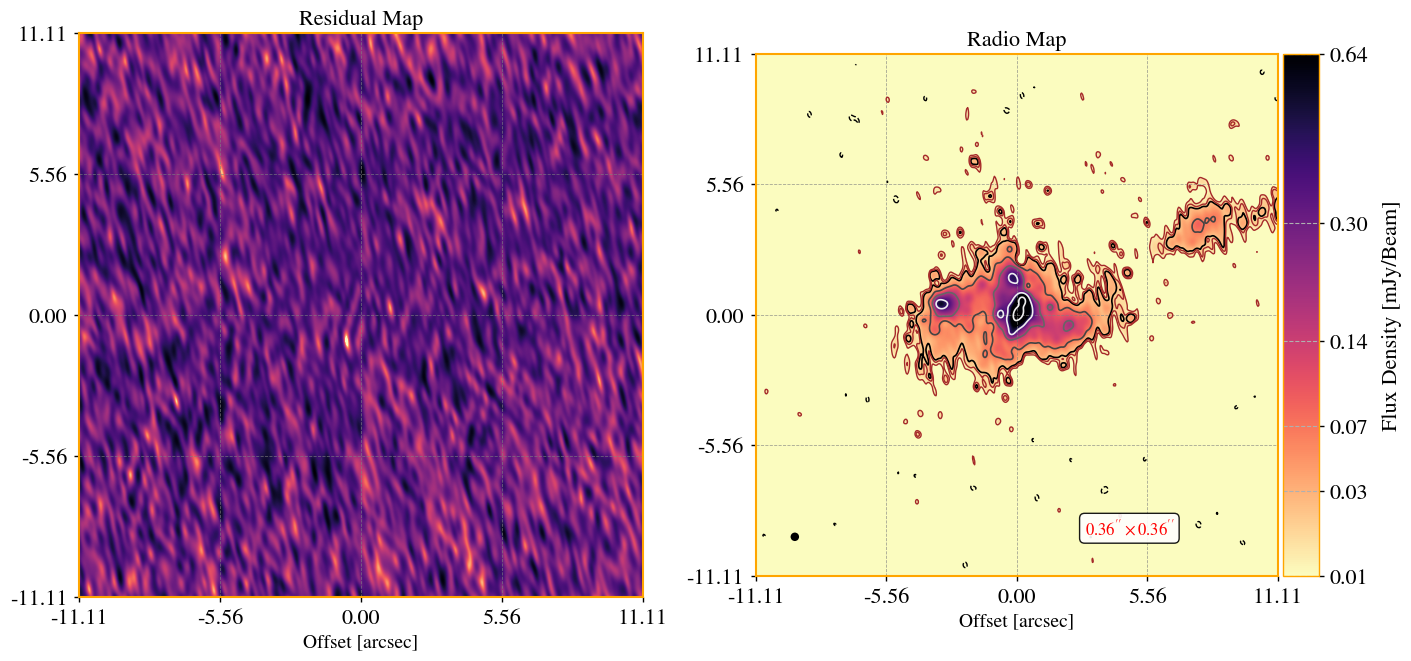

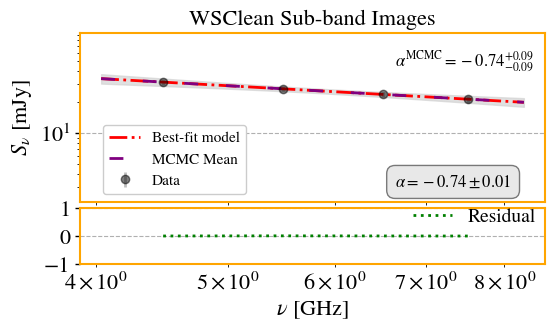

<Figure size 600x400 with 0 Axes>

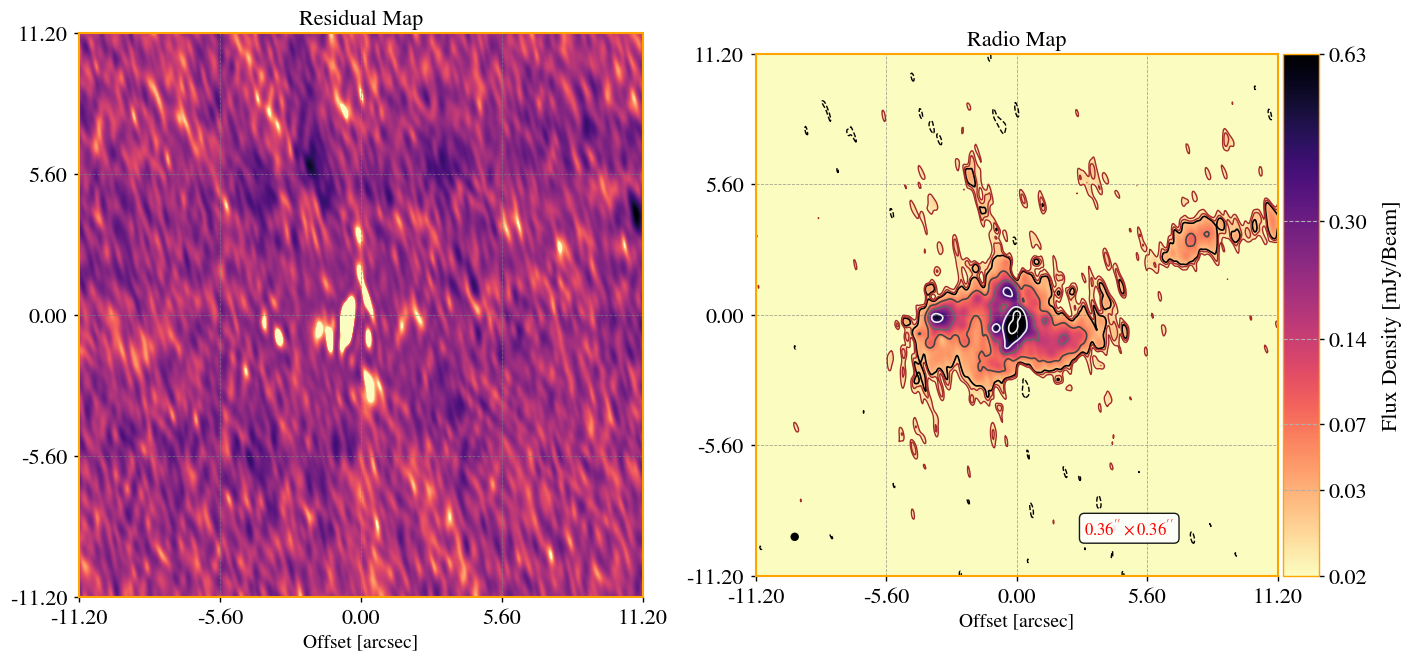

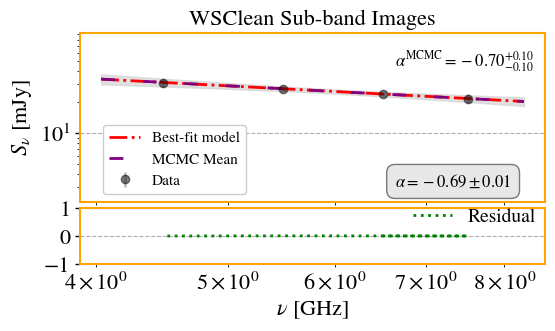

<Figure size 600x400 with 0 Axes>

In [11]:
if (('ap1' in config.steps) and
        ('ap1' not in pipeline.steps_performed) and
        ('ap1' in pipeline.parameter_selection['p0_pos'].keys())):
    pipeline.run_step('ap1')

 ++==> Splitting final self-calibrated (p+ap) visibility.
       Filename is: /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/MCG12-02-001_A_C_sf.ms
 ++==> Running statw on split data...


....10....20....30....40....50....60....70....80....90....100%


 ++==> Running statw on split phase-only self-calibrated visibility...


....10....20....30....40....50....60....70....80....90....100%


 ++==> Imaging visibilities after self-calibration...


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 0, PID 3876257 on stardust
Node 1, PID 3876258 on stardust
Node 2, PID 3876259 on stardust
Node 5, PID 3876262 on stardust
Node 3, PID 3876260 on stardust
Node 6, PID 3876263 on stardust
Node 4, PID 3876261 on stardust
Node 7, PID 3876264 on stardust
2025-Jan-17 12:58:53.732457 Process 6 finished.
2025-Jan-17 12:58:53.732484 Process 2 finished.
2025-Jan-17 12:58:53.732487 Process 3 finished.
2025-Jan-17 12:58:53.732454 Process 4 finished.
2025-Jan-17 12:58:53.732456 Process 7 finished.
2025-Jan-17 12:58:53.732441 Process 0 finished.
2025-Jan-17 12:58:53.732480 Process 1 finished.
2025-Jan-17 12:58:53.732460 Process 5 finished.
  0.5
Using mtmfs method.
selfcal_image_MCG12-02-001_A_C_sf_2560x2560_0.0421arcsec_multiscale__r0.5
 ++==>> Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/galnet/LIRGI_Sample/VLA-Archive/A_config/23A-324/C_band/MCG+12-02-001/autoselfcal/:/mnt /media/sagauga/xfs_evo/wsclean3.4-idg-everybeam-eMERLIN_portable.sif m

<string>:3407: RuntimeWarning: divide by zero encountered in divide


Flux density =  0.022366396916606694
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 30.59 +/- 3.12 mJy
Fractional error = 0.10
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 30.59 +/- 1.88 mJy
Fractional error = 0.06
-----------------------------------------------------------------
Flux density =  0.030587145506724738
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 26.74 +/- 3.38 mJy
Fractional error = 0.13
Flux Density and error (quadrature |fract_err + res_err + rms|): 
Flux Density = 26.74 +/- 1.53 mJy
Fractional error = 0.06
-----------------------------------------------------------------
Flux density =  0.026737409605014053
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 36.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1001.30it/s]


{'A1': {'best': 28.135937957208128, 'lower_bound': 27.24657784588607, 'upper_bound': 29.014546767362567, 'lower': 0.889360111322059, 'upper': 0.8786088101544394}, 'alpha': {'best': -0.9006992203442736, 'lower_bound': -1.0563820658168948, 'upper_bound': -0.7458240046709701, 'lower': 0.15568284547262112, 'upper': 0.15487521567330353}}
(40000, 2)
++==>> Parameter Results (MCMC sampling).
++==>> Parameter Results (from least-squares fit).
[[Variables]]
    A1:     28.4780791 +/- 0.79716782 (2.80%) (init = 28.47808)
    alpha: -0.84626413 +/- 0.11671590 (13.79%) (init = -0.8462641)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, alpha) = 0.841


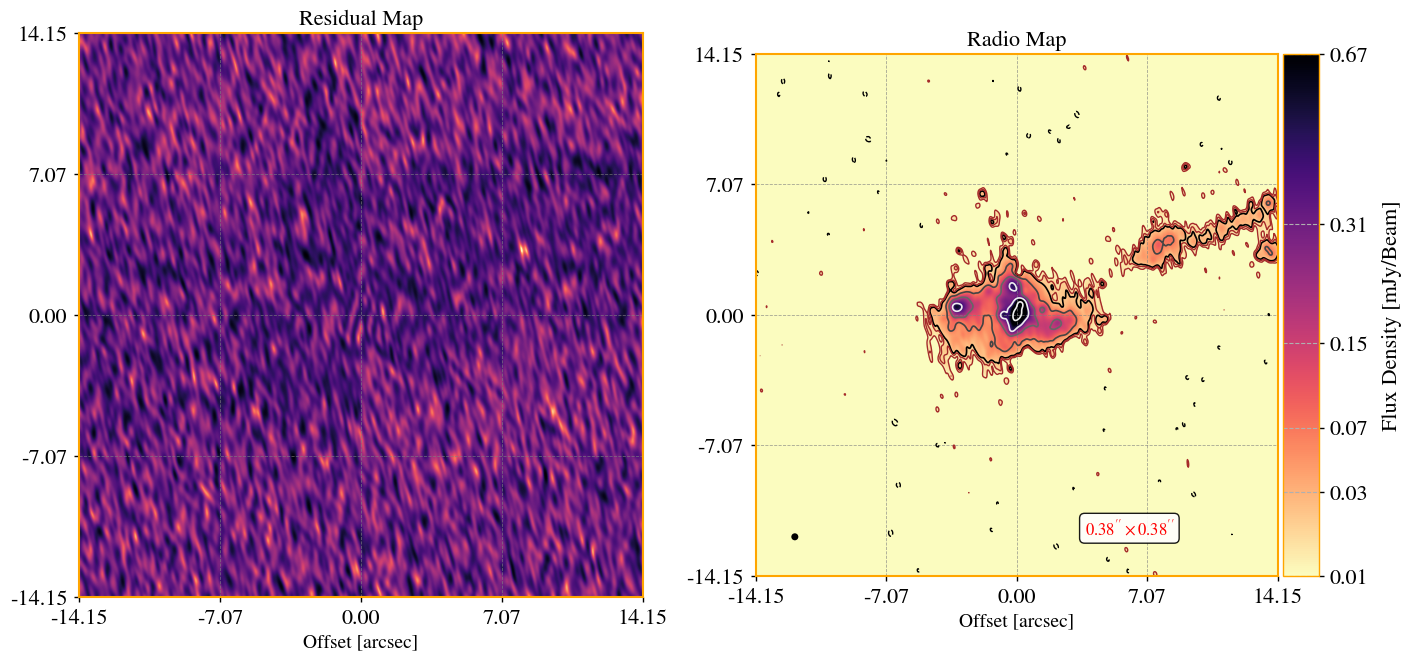

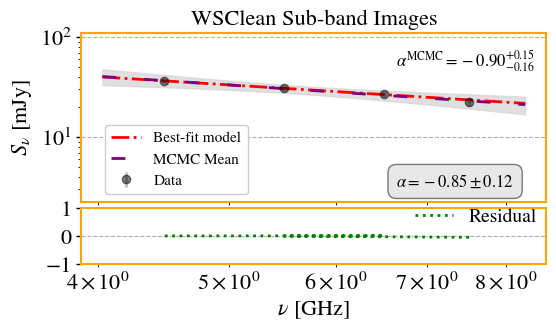

<Figure size 600x400 with 0 Axes>

In [12]:
if 'split_trial_1' in config.steps:
    pipeline.run_step('split_trial_1')

# if 'autoflag_final' in config.steps:
#     pipeline.run_step('autoflag_final')

if 'report_results' in config.steps:
    pipeline.run_step('report_results')

In [12]:
# from importlib import reload
# import ph4ser
# reload(ph4ser)

# # Store the original instance
# original_pipeline = pipeline

# # Update the class definition while preserving the instance
# original_pipeline.__class__ = ph4ser.Pipeline